In [10]:
!pip install kaggle # 케글 데이터 설치

# kaggle.json 파일 코렙드라이브로 마운팅하기
from google.colab import files 
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"parkjeongchan","key":"a2785bf3dc9c7badc7b88e6a333f09e9"}'}

캐글 로그인

In [11]:
# 케글 파일 만들기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json

# 케글 제이슨 파일 제대로 설치 됬는지 확인
!ls -lha kaggle.json # kaggle.json 이렇게

-rw-r--r-- 1 root root 69 Jun 22 05:57 kaggle.json


케글 파일 만들기

In [12]:
! kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         41           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        121           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        687           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        137           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1481           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14006           False  
house-pr

In [13]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

!unzip gtsrb-german-traffic-sign.zip # zip 파일 풀기

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/

traffic sign 캐글에서 다운로드

In [64]:
import pandas as pd
import numpy as np

import os
import pathlib

import cv2 
from PIL import Image 
from tensorflow.keras.preprocessing import image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import style

np.random.seed(42)

%matplotlib inline

필요한것들 임폴트

In [65]:

data_dir = pathlib.Path('/content/Meta')
train_path = pathlib.Path('/content/Train')
test_path = pathlib.Path('/content/Test')


IMG_HEGHT = 30
IMG_WIDTH = 30
channels = 3


NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

경로 설정,이미지 높이 30 넓이 30 색은 컬러로,카테고리 확인

In [66]:
folders = os.listdir('/content/train')
train_num = []
class_num = []

for folder in folders:
  train_files = os.listdir(str(train_path) + '/'+ folder) 
  train_num.append(len(train_files))
  class_num.append(classes[int(folder)])


zipped_lists =  zip(train_num, class_num)
sorted_pairs = sorted(zipped_lists)
tuples =  zip(*sorted_pairs) 
train_num, class_num = [ list(tuple) for tuple in tuples]


데이터 셋 분류,데이터 정렬해서 리스트 반환

In [67]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img) # 이미지를 넘파이 배열로 변환
            images.append(image) 
            labels.append(category)
    
    return images, labels
    
images, labels = load_data(train_path)

labels = to_categorical(labels)

x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)  

넘파이 배열로 변환,원 핫 인코딩, split

In [68]:
model = Sequential()

IMG_HEIGHT = 30
IMG_WIDTH = 30

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Conv2D(filters=80, kernel_size=2, activation='relu'))


model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 6, 6, 64)         

학습 :컨볼브계층 3개 활성화 함수는 relu

In [69]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 6, 6, 64)         

Flatten 후 출력층에서 활성화 함수 softmax

In [70]:

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',                 
    metrics=['accuracy']
)


EPOCHS = 30
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_test, y_test), 
                    epochs=EPOCHS, 
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 3s 40ms/step - loss: 5.8710 - accuracy: 0.0444 - val_loss: 3.6688 - val_accuracy: 0.0648
Epoch 2/30
60/60 [==============================] - 2s 32ms/step - loss: 3.5519 - accuracy: 0.0892 - val_loss: 3.4566 - val_accuracy: 0.1287
Epoch 3/30
60/60 [==============================] - 2s 35ms/step - loss: 3.3062 - accuracy: 0.1223 - val_loss: 3.1481 - val_accuracy: 0.1827
Epoch 4/30
60/60 [==============================] - 2s 32ms/step - loss: 3.0393 - accuracy: 0.1731 - val_loss: 2.8097 - val_accuracy: 0.2672
Epoch 5/30
60/60 [==============================] - 2s 35ms/step - loss: 2.6618 - accuracy: 0.2567 - val_loss: 2.2270 - val_accuracy: 0.3846
Epoch 6/30
60/60 [==============================] - 2s 32ms/step - loss: 2.1737 - accuracy: 0.3589 - val_loss: 1.7416 - val_accuracy: 0.4816
Epoch 7/30
60/60 [==============================] - 2s 35ms/step - loss: 1.8367 - accuracy: 0.4379 - val_loss: 1.4830 - val_accuracy: 0.5447
Epoch 8/30
60

모델 컴파일,모델 핏,loss함수 cee,optimizer는 adam

In [71]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 2s 3ms/step - loss: 0.0802 - accuracy: 0.9790
test set accuracy:  97.89594411849976


테스트셋으로 테스트 한 결과 97퍼의 정확도를 보였다.

In [72]:
Y_test = pd.read_csv('/content/Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

a =  pathlib.Path('/content/')

output = list()
for img in test_images:
    image = load_img(os.path.join(a, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
y_prob = model.predict(X_test)
pred = y_prob.argmax(axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  93.31749802058592


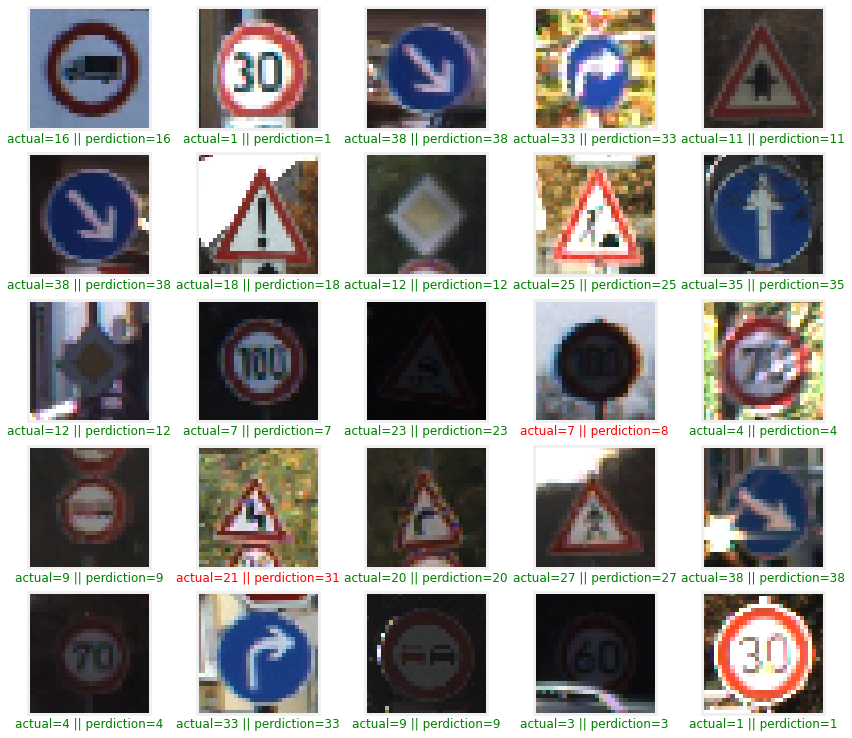

In [73]:
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('actual={} || perdiction={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

25개중 23개 예측 성공

In [74]:
model.save('traffic_sign.h5')

모델 저장